In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [2]:
games_df = pd.read_csv('games.csv')

In [3]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games_df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
games_df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
games_df['Name'].duplicated().sum()

5155

In [7]:
games_df['Name'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16710     True
16711    False
16712    False
16713     True
16714     True
Name: Name, Length: 16715, dtype: bool

In [16]:
pd.set_option('display.max_rows', None)
all_unique_names = games_df['Name'].unique()
display(all_unique_names.tolist())

['Wii Sports',
 'Super Mario Bros.',
 'Mario Kart Wii',
 'Wii Sports Resort',
 'Pokemon Red/Pokemon Blue',
 'Tetris',
 'New Super Mario Bros.',
 'Wii Play',
 'New Super Mario Bros. Wii',
 'Duck Hunt',
 'Nintendogs',
 'Mario Kart DS',
 'Pokemon Gold/Pokemon Silver',
 'Wii Fit',
 'Kinect Adventures!',
 'Wii Fit Plus',
 'Grand Theft Auto V',
 'Grand Theft Auto: San Andreas',
 'Super Mario World',
 'Brain Age: Train Your Brain in Minutes a Day',
 'Pokemon Diamond/Pokemon Pearl',
 'Super Mario Land',
 'Super Mario Bros. 3',
 'Grand Theft Auto: Vice City',
 'Pokemon Ruby/Pokemon Sapphire',
 'Brain Age 2: More Training in Minutes a Day',
 'Pokemon Black/Pokemon White',
 'Gran Turismo 3: A-Spec',
 'Call of Duty: Modern Warfare 3',
 'Pokémon Yellow: Special Pikachu Edition',
 'Call of Duty: Black Ops 3',
 'Call of Duty: Black Ops',
 'Pokemon X/Pokemon Y',
 'Call of Duty: Black Ops II',
 'Call of Duty: Modern Warfare 2',
 'Grand Theft Auto III',
 'Super Smash Bros. Brawl',
 'Mario Kart 7',
 'Ani

In [17]:
games_df['Name'].drop_duplicates()

0                                               Wii Sports
1                                        Super Mario Bros.
2                                           Mario Kart Wii
3                                        Wii Sports Resort
4                                 Pokemon Red/Pokemon Blue
5                                                   Tetris
6                                    New Super Mario Bros.
7                                                 Wii Play
8                                New Super Mario Bros. Wii
9                                                Duck Hunt
10                                              Nintendogs
11                                           Mario Kart DS
12                             Pokemon Gold/Pokemon Silver
13                                                 Wii Fit
14                                      Kinect Adventures!
15                                            Wii Fit Plus
16                                      Grand Theft Auto

Данные имеют некоторое количество пропусков в столбцах с именем пользователя, жанра, года релиза игры, а также в столбцах с оценкой игры пользователями и критиками. Пропуски в столбцах с именем и жанром можно удалить, так как их всего 2. Пропуски в столбцах с оценками я оставлю пока, так как корректно их заполнить невозможно, потому что оценка является личным мнением каждого пользователя или критика. Пропуски в столбце с датой релиза также оставлю, вероятнее всего, они появились там из-за ошибки выгрузки данных, всего у нас 269 пропусков и искать вручную информацию по каждой игре не лучшая идея.
Также в данных имеется 5155 дублирующих значений в столбце с названием игры.

ПОДГОТОВКА ДАННЫХ

In [18]:
games_df.rename(columns=str.lower, inplace=True)

In [19]:
games_df = games_df.dropna(subset=['name', 'genre', 'year_of_release'])

In [20]:
games_df['year_of_release'] = games_df['year_of_release'].astype(int)


In [21]:
games_df.user_score.unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [22]:
tbd_df = games_df.query('user_score == "tbd"')
tbd_df.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E


In [23]:
tbd_df.shape

(2376, 11)

In [24]:
games_df.loc[games_df['user_score'] == "tbd", 'user_score'] = np.nan

In [25]:
for column in ['critic_score', 'rating', 'user_score']:
    games_df.loc[games_df[column].isna(), column] = -1

In [26]:
games_df['user_score'] = pd.to_numeric(games_df['user_score'])

In [27]:
games_df['user_score'].unique()

array([ 8. , -1. ,  8.3,  8.5,  6.6,  8.4,  8.6,  7.7,  6.3,  7.4,  8.2,
        9. ,  7.9,  8.1,  8.7,  7.1,  3.4,  5.3,  4.8,  3.2,  8.9,  6.4,
        7.8,  7.5,  2.6,  7.2,  9.2,  7. ,  7.3,  4.3,  7.6,  5.7,  5. ,
        9.1,  6.5,  8.8,  6.9,  9.4,  6.8,  6.1,  6.7,  5.4,  4. ,  4.9,
        4.5,  9.3,  6.2,  4.2,  6. ,  3.7,  4.1,  5.8,  5.6,  5.5,  4.4,
        4.6,  5.9,  3.9,  3.1,  2.9,  5.2,  3.3,  4.7,  5.1,  3.5,  2.5,
        1.9,  3. ,  2.7,  2.2,  2. ,  9.5,  2.1,  3.6,  2.8,  1.8,  3.8,
        0. ,  1.6,  9.6,  2.4,  1.7,  1.1,  0.3,  1.5,  0.7,  1.2,  2.3,
        0.5,  1.3,  0.2,  0.6,  1.4,  0.9,  1. ,  9.7])

In [28]:
games_df['copy_sales'] = games_df['na_sales'] + games_df['jp_sales'] + games_df['eu_sales'] + games_df['other_sales']

In [29]:
games_df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,copy_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-1,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,-1,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,-1,28.31


In [30]:
games_df.shape

(16444, 12)

Для удобства работы с данными названия были переведены в нижний регистр, также я удалила пропуски в столбцах с именем, жанром и годом релиза игры. Так как для анализа важны игры с годом выпуска, а корректно его заполнить не получится, пропуски были удалены. Также я изменила тип столбца с годом на целое число. Вероятно, пропущенные значения во всех столбцах кроме оценки критиков и пользователей были получены из-за некорректной выгрузки данных. Пропуски в столбце с оценкой критиков могли появиться там по той причине, что игры не оценивались. Столбец с пропусками пользовательском рейтинге я также не заполняла, потому что указать среднюю оценку будет неправильным решением, а пропущенные значения могли появиться там также из-за того, что игра еще не была оценена или возникла ошибка при сборе или выгрузке данных. 

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. В нашем случае мы имеем 2376 таких значений, думаю, будет логично заполнить их значением NaN, чтобы в дальнейшем работать с ними как с пропусками. На место пропусков в столбцах 'critic_score', 'user_score' и 'rating' я поставила заглушку -1, чтобы в дальнейшем было удобно работать с данными.

ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ

Для начала посмотрим в какие годы было продано больше всего копий игр.

In [31]:
year_statistics = games_df.pivot_table(index='year_of_release', values='platform', aggfunc='count')
year_statistics.sort_values(by='platform', ascending=False)

,platform
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


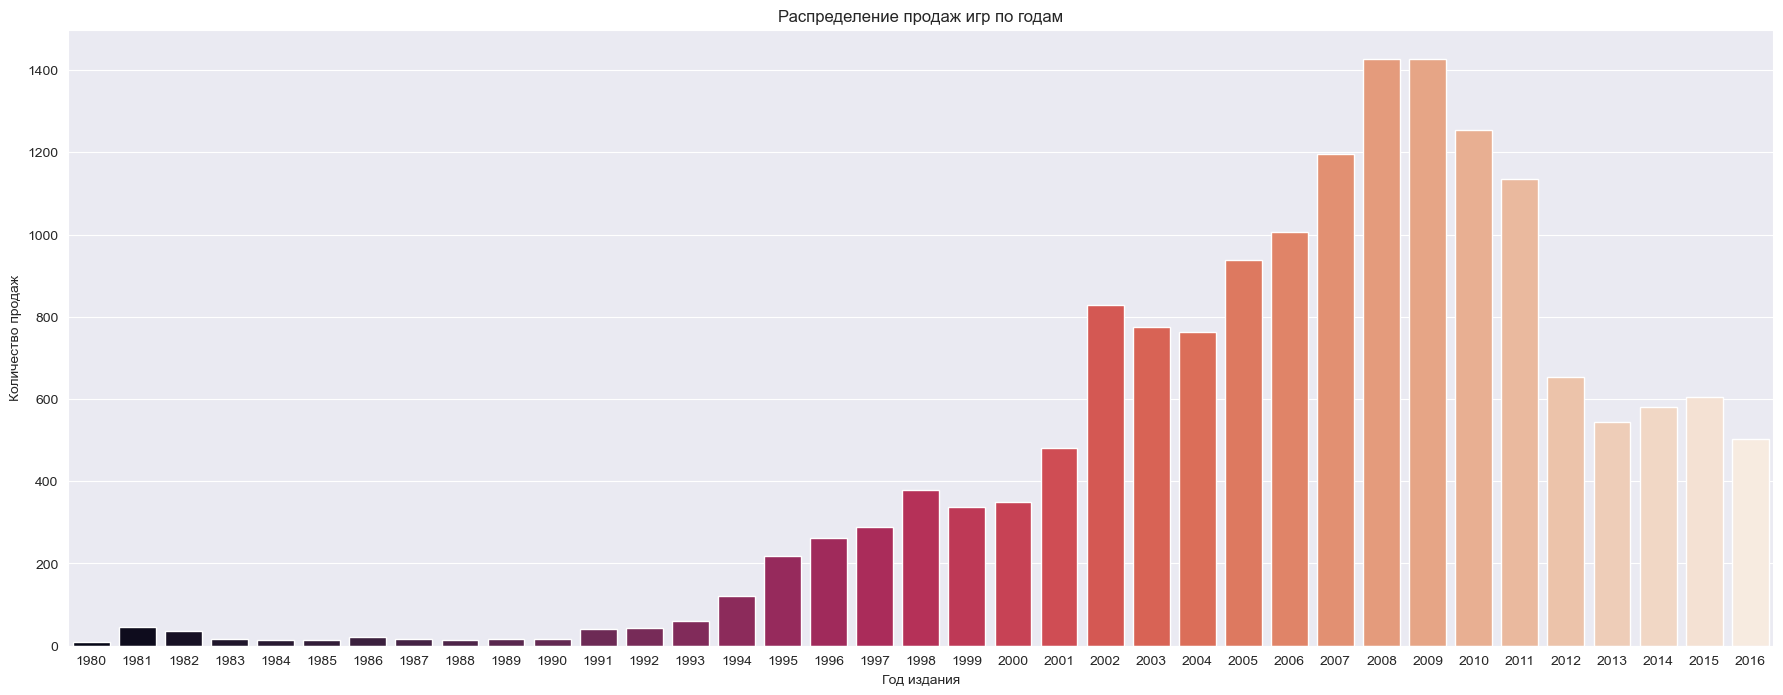

In [32]:
f, ax = plt.subplots(figsize=(22, 8))
sns.barplot(x=year_statistics.index, y=year_statistics.platform, data=year_statistics, palette='rocket', hue=year_statistics.index, legend=False)
plt.title('Распределение продаж игр по годам')
plt.ylabel('Количество продаж')
plt.xlabel('Год издания');

Больше всего копий игр было продано в 2008-2009 годах. 

Теперь можем узнать наиболее популярные игровые платформы среди пользователей.

In [565]:
platform_statistics = games_df.pivot_table(index='platform', values='copy_sales', aggfunc='sum')
platform_statistics.sort_values(by='copy_sales', ascending=False)

,copy_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


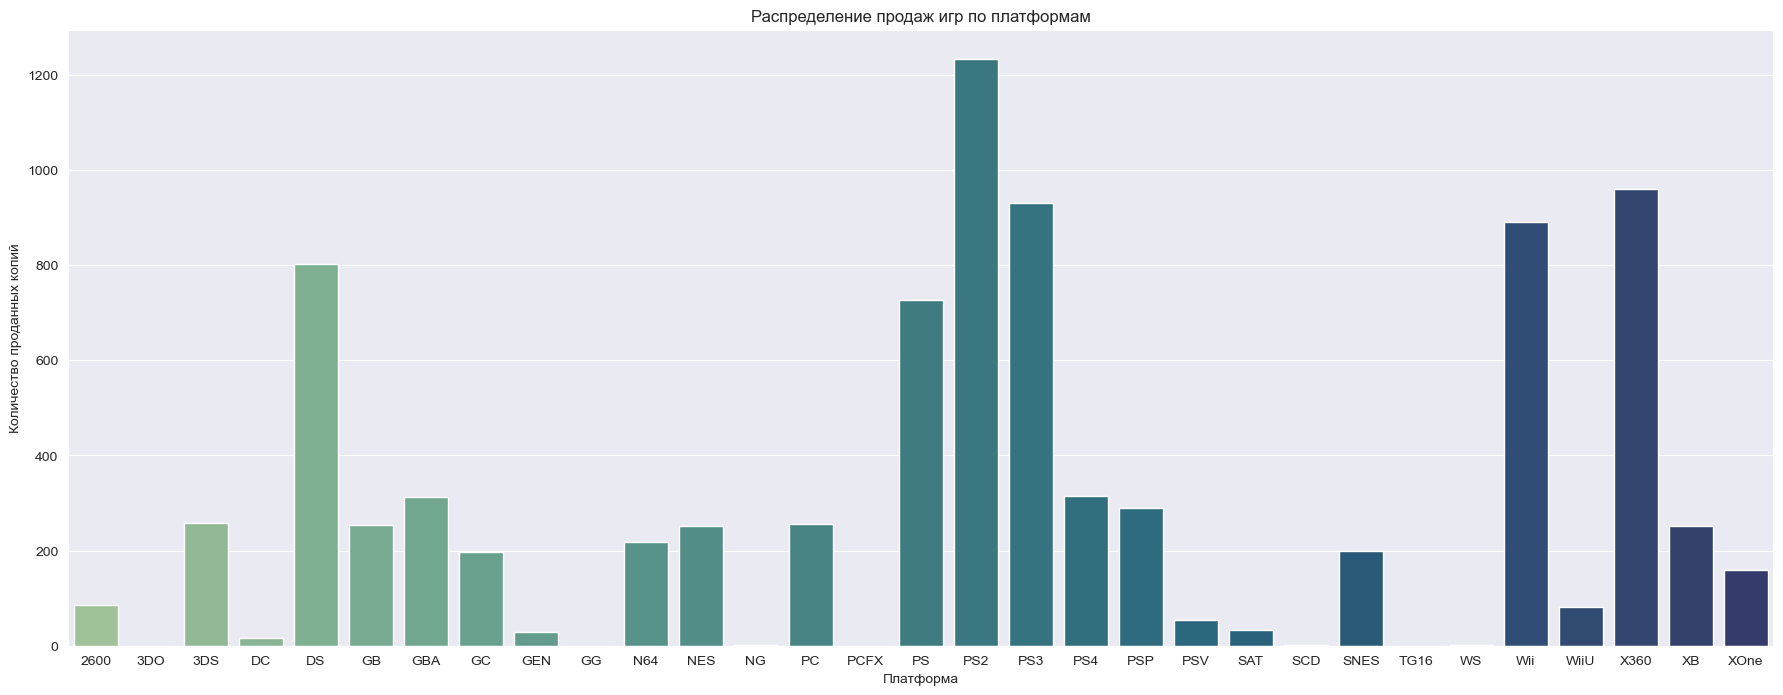

In [566]:
plt.subplots(figsize=(22, 8))
sns.barplot(x=platform_statistics.index, y=platform_statistics.copy_sales, data=platform_statistics, palette='crest', hue=platform_statistics.index, legend=False)
plt.title('Распределение продаж игр по платформам')
plt.ylabel('Количество проданных копий')
plt.xlabel('Платформа');

Выберем из них топ-5, с которыми будем дальше работать.

In [567]:
top_5_platforms = platform_statistics.sort_values(by='copy_sales', ascending=False).head(5).index.get_level_values('platform')
top_5_platforms

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')

Теперь мы можем отследиь как изменялись продажи среди 5 наиболее популярных игровых платформ.

In [568]:
top_5_data = games_df[games_df['platform'].isin(top_5_platforms)]

In [569]:
top_5 = top_5_data.query('year_of_release >= 2000')

In [570]:
top_5 = top_5.pivot_table(index=['platform', 'year_of_release'], values='copy_sales', aggfunc='sum').reset_index()
top_5

,platform,year_of_release,copy_sales
0,DS,2004,17.27
1,DS,2005,130.14
2,DS,2006,119.81
3,DS,2007,146.94
4,DS,2008,145.31
5,DS,2009,119.54
6,DS,2010,85.02
7,DS,2011,26.18
8,DS,2012,11.01
9,DS,2013,1.54


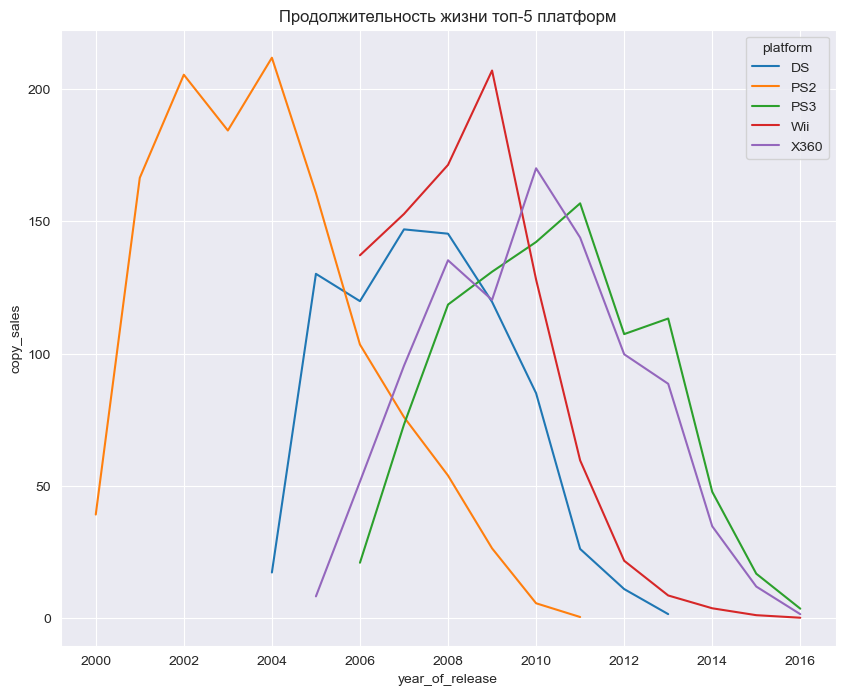

In [571]:
plt.figure(figsize=(10, 8))
sns.lineplot(data=top_5, x='year_of_release', y='copy_sales', hue='platform')
plt.title('Продолжительность жизни топ-5 платформ');

Я выбрала топ-5 игр начиная с 2000 года, так как до этого игры выпускались только на платформе DS. В дальнейшем анализе будут учитываться платформы только за последние 3 года, так как некоторые из них только начали развиваться, а некоторые, наоборот, стали менее популярными и игры на них практически перестали выпускаться, как, например, PS2. Средняя продолжительность жизни платформы составляет около 8 лет. Однако, уже на  4-5 году платформы начинают приходить в упадок, так как на них начинает выпускаться все меньше и меньше игр. Исключением можно назвать PS3 и X360, которые были популярны на рынке около 7 лет.

Так как в основном популярность платформы около 4 лет, чтобы спрогнозировать данные на 2017, я возьму наиболее популярные платформы за последние 3 года. Также, если учесть, что игры в среднем разрабатываются около 4 лет, то игры, разработка которых была начата в 2013 выйдут в 2016-2017 году

In [33]:
actual_platforms = games_df.query('year_of_release >= 2013').platform
actual_platforms.unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [34]:
top_actual = games_df[games_df['platform'].isin(actual_platforms)]

In [35]:
top_actual = top_actual.query('year_of_release >= 2013')

Также известно, что поддержка PSP была прекращена в 2015 году, а DS был заменен на 3DS, поэтому исключим их из прогноза.

In [36]:
top_9_actual = top_actual.pivot_table(index=['platform', 'year_of_release'], values='copy_sales', aggfunc='sum').reset_index()
top_9_actual = top_9_actual[(top_9_actual.platform != "PSP") &  (top_9_actual.platform != "DS")]
top_9_actual

,platform,year_of_release,copy_sales
0,3DS,2013,56.57
1,3DS,2014,43.76
2,3DS,2015,27.78
3,3DS,2016,15.14
5,PC,2013,12.38
6,PC,2014,13.28
7,PC,2015,8.52
8,PC,2016,5.25
9,PS3,2013,113.25
10,PS3,2014,47.76


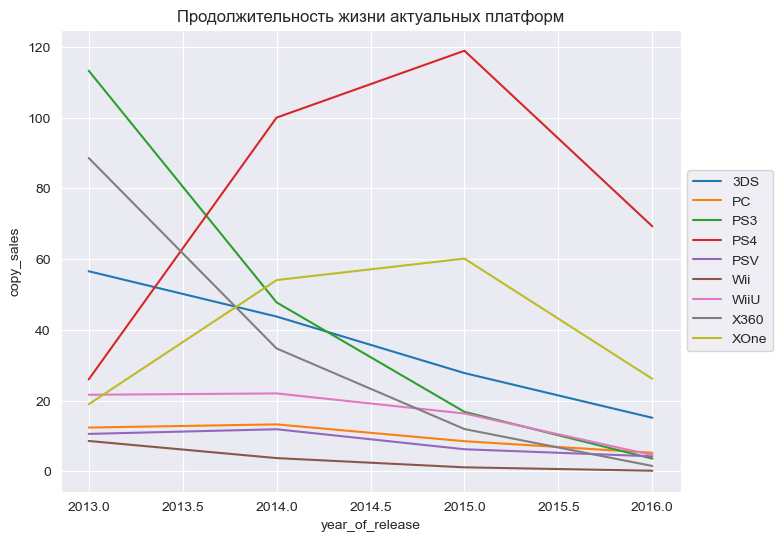

In [37]:
plt.figure(figsize=(8, 6))
sns.lineplot(data=top_9_actual, x='year_of_release', y='copy_sales', hue='platform')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Продолжительность жизни актуальных платформ');

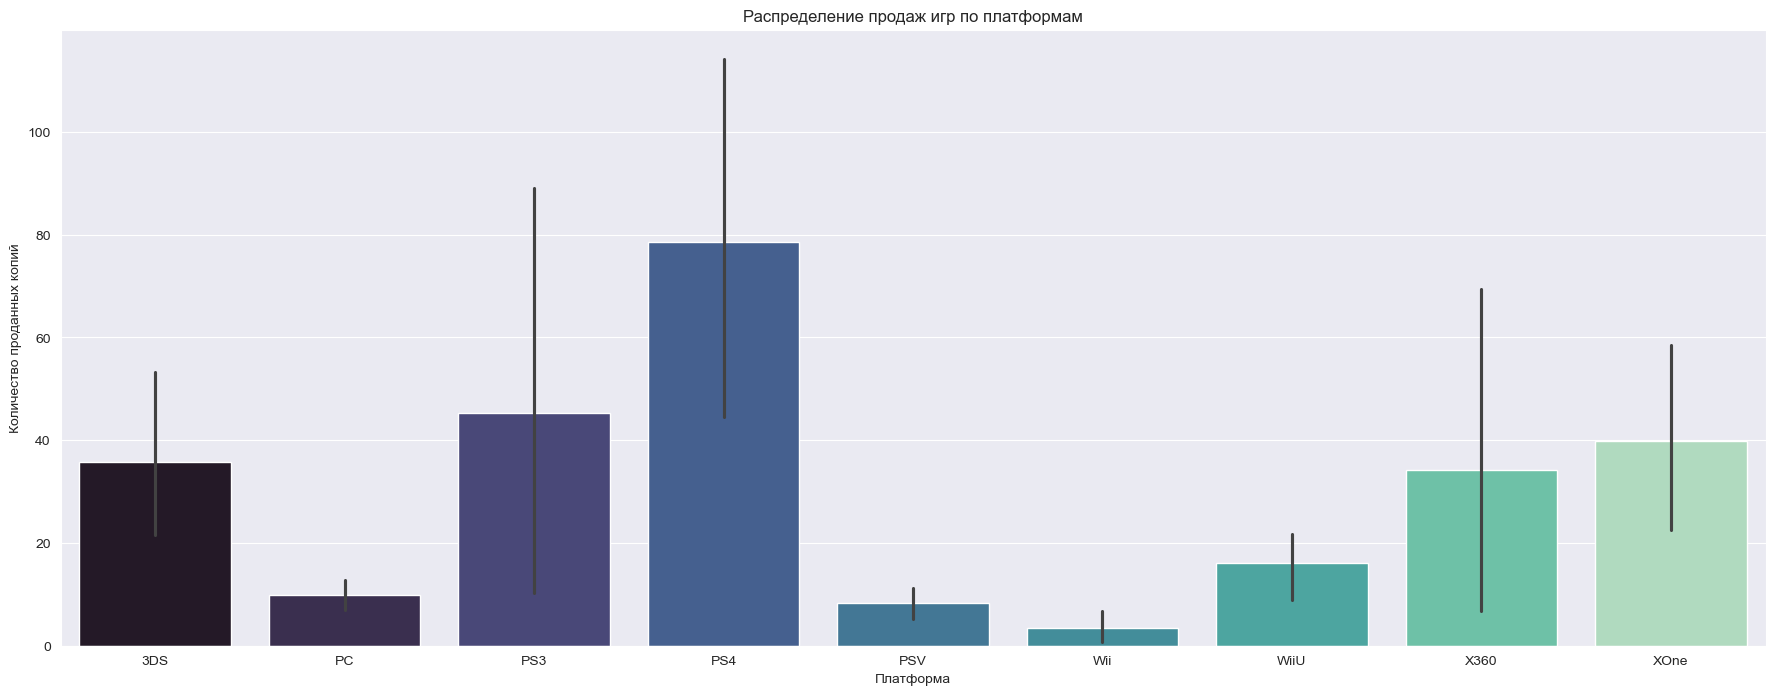

In [38]:
plt.subplots(figsize=(22, 8))
sns.barplot(x=top_9_actual.platform, y=top_9_actual.copy_sales, data=top_9_actual, palette='mako', hue=top_9_actual.platform, legend=False)
plt.title('Распределение продаж игр по платформам')
plt.ylabel('Количество проданных копий')
plt.xlabel('Платформа');

На графике видно, что лидерами являются PS4, PS3, XOne, X360 и 3DS. Проданных копий игр на остальные платформы значительно меньше. Это объясняется тем, что платформы приходят в упадок, поэтому игр на них выпускается все меньше. Так как для анализа необходим актуальный период лишь за последние 4 года, можем рассмотреть статистику продаж по платформам, разбив это на отдельные года. 

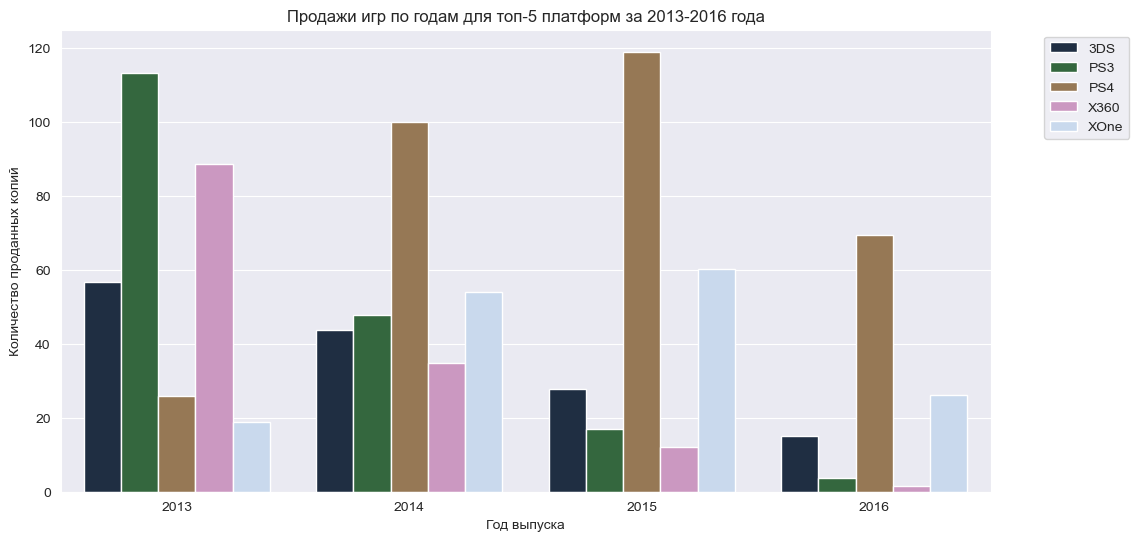

In [39]:
top_platforms = top_9_actual.groupby('platform')['copy_sales'].sum().nlargest(5).index
filtered_data = top_9_actual[top_9_actual['platform'].isin(top_platforms)]
sales_by_year_platform = filtered_data.groupby(['year_of_release', 'platform'])['copy_sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='year_of_release', y='copy_sales', hue='platform', data=sales_by_year_platform, palette='cubehelix')
plt.title('Продажи игр по годам для топ-5 платформ за 2013-2016 года')
plt.xlabel('Год выпуска')
plt.ylabel('Количество проданных копий')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');

Данный график подтверждает рост популярности такой платформы как PS4, в то время, как остальные медленно приходят в упадок. Также на рынке все еще держится XOne, хотя к 2016 игр на нее стало выпускаться меньше. Теперь мы можем рассмотреть продажи игр по всем платформам более глобально.

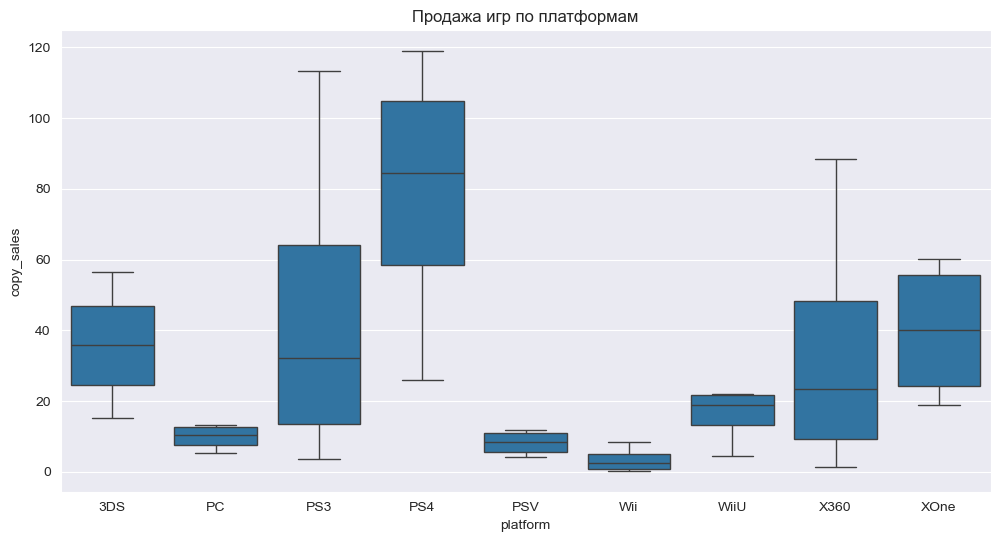

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=top_9_actual.platform, y=top_9_actual.copy_sales)
plt.title('Продажа игр по платформам');

Даже в глобальной разбивке мы видим, что несомненными лидерами продаж являются PS3, PS4, X360 и XOne. Теперь посмотрим как влияют отзывы критиков на продажи игр на PS4.

In [41]:
actual_games_df = games_df.query('year_of_release >= 2013')

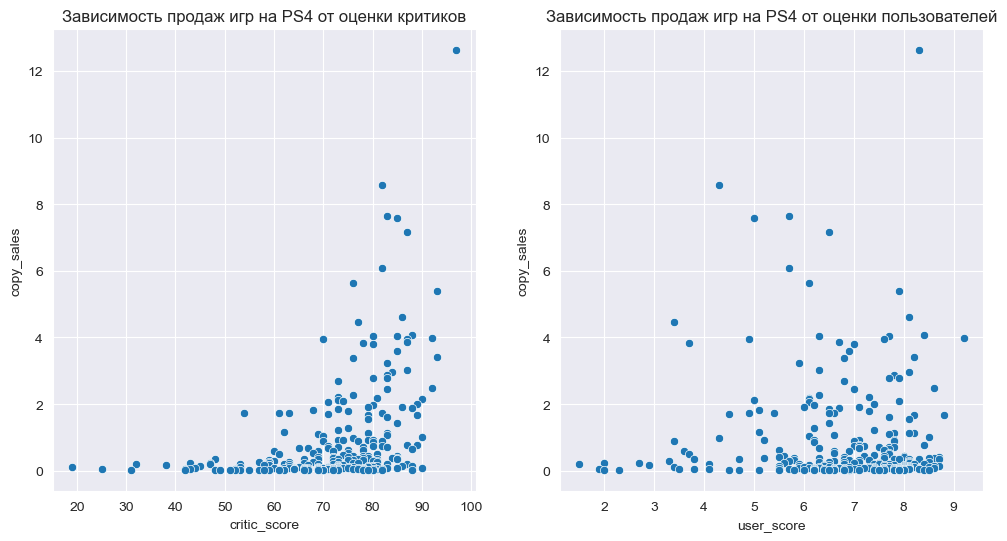

In [42]:
ps4 = actual_games_df.loc[
    (actual_games_df['platform'] == "PS4") &
    (actual_games_df['user_score'] != -1) &
    (actual_games_df['critic_score'] != -1)
    ]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=ps4, x='critic_score', y='copy_sales')
plt.title('Зависимость продаж игр на PS4 от оценки критиков')

plt.subplot(1, 2, 2)
sns.scatterplot(data=ps4, x='user_score', y='copy_sales')
plt.title('Зависимость продаж игр на PS4 от оценки пользователей');

In [43]:
print('Коэффициент корреляции продаж и оценок критиков:', round(ps4['critic_score'].corr(ps4['copy_sales']), 2))
print('Коэффициент корреляции продаж и оценок пользователей:', round(ps4['user_score'].corr(ps4['copy_sales']), 2))

Коэффициент корреляции продаж и оценок критиков: 0.41
Коэффициент корреляции продаж и оценок пользователей: -0.03


Мы видим, что в большей степени на уровень продаж влияют оценки критиков, так как пользователь может оценить игру и на 4.5 балла, но количество игр будет продано меньше, чем с оценкой выше. Теперь можем посчитать коэффициент корреляции продаж и сравнить данный вывод с продажами игр на других платформах.

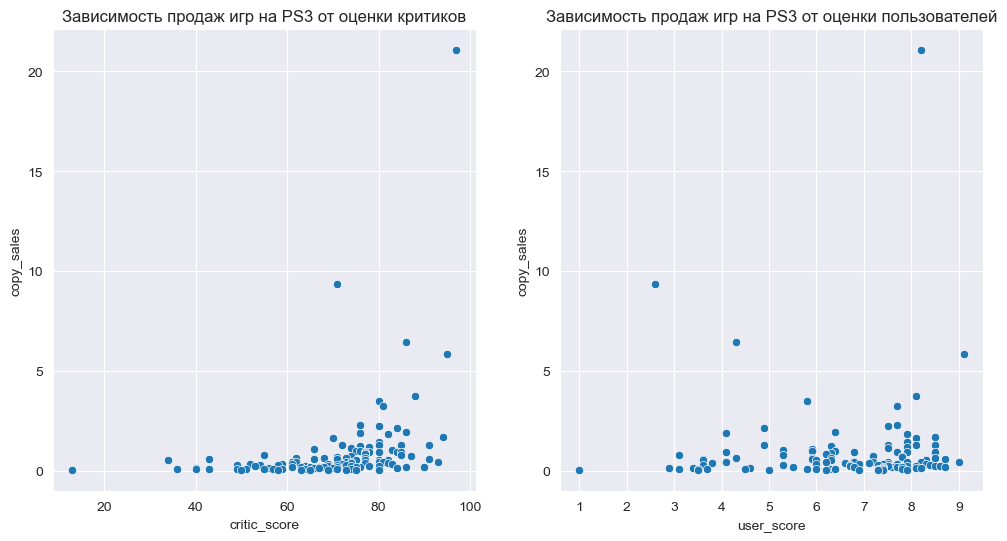

In [44]:
ps3 = actual_games_df.loc[
    (actual_games_df['platform'] == "PS3") &
    (actual_games_df['user_score'] != -1) &
    (actual_games_df['critic_score'] != -1)
    ]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=ps3, x='critic_score', y='copy_sales')
plt.title('Зависимость продаж игр на PS3 от оценки критиков')

plt.subplot(1, 2, 2)
sns.scatterplot(data=ps3, x='user_score', y='copy_sales')
plt.title('Зависимость продаж игр на PS3 от оценки пользователей');

In [45]:
print('Коэффициент корреляции продаж и оценок критиков:', round(ps3['critic_score'].corr(ps3['copy_sales']), 2))
print('Коэффициент корреляции продаж и оценок пользователей:', round(ps3['user_score'].corr(ps3['copy_sales']), 2))

Коэффициент корреляции продаж и оценок критиков: 0.33
Коэффициент корреляции продаж и оценок пользователей: 0.02


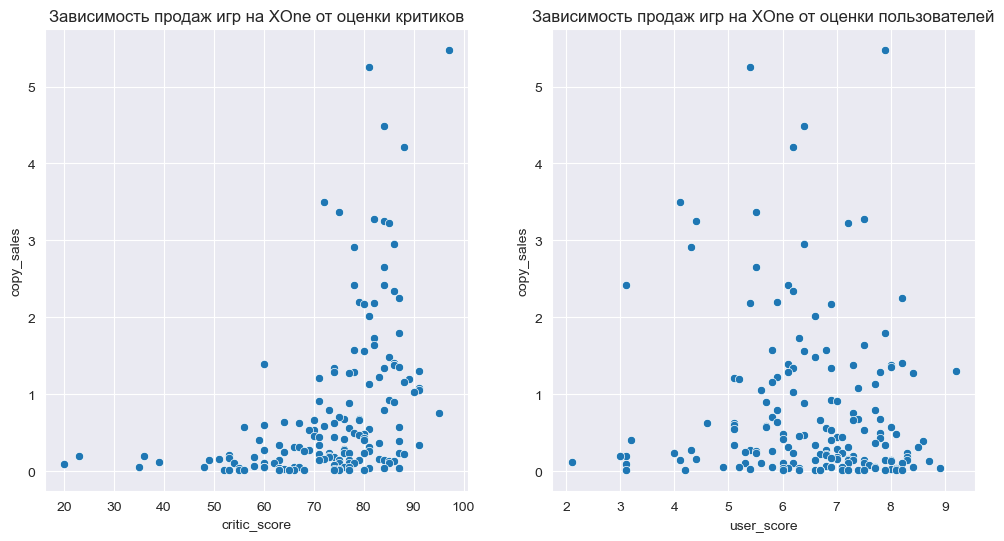

In [46]:
xone = actual_games_df.loc[
    (actual_games_df['platform'] == "XOne") &
    (actual_games_df['user_score'] != -1) &
    (actual_games_df['critic_score'] != -1)
    ]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=xone, x='critic_score', y='copy_sales')
plt.title('Зависимость продаж игр на XOne от оценки критиков')

plt.subplot(1, 2, 2)
sns.scatterplot(data=xone, x='user_score', y='copy_sales')
plt.title('Зависимость продаж игр на XOne от оценки пользователей');

In [47]:
print('Коэффициент корреляции продаж и оценок критиков:', round(xone['critic_score'].corr(xone['copy_sales']), 2))
print('Коэффициент корреляции продаж и оценок пользователей:', round(xone['user_score'].corr(xone['copy_sales']), 2))

Коэффициент корреляции продаж и оценок критиков: 0.41
Коэффициент корреляции продаж и оценок пользователей: -0.09


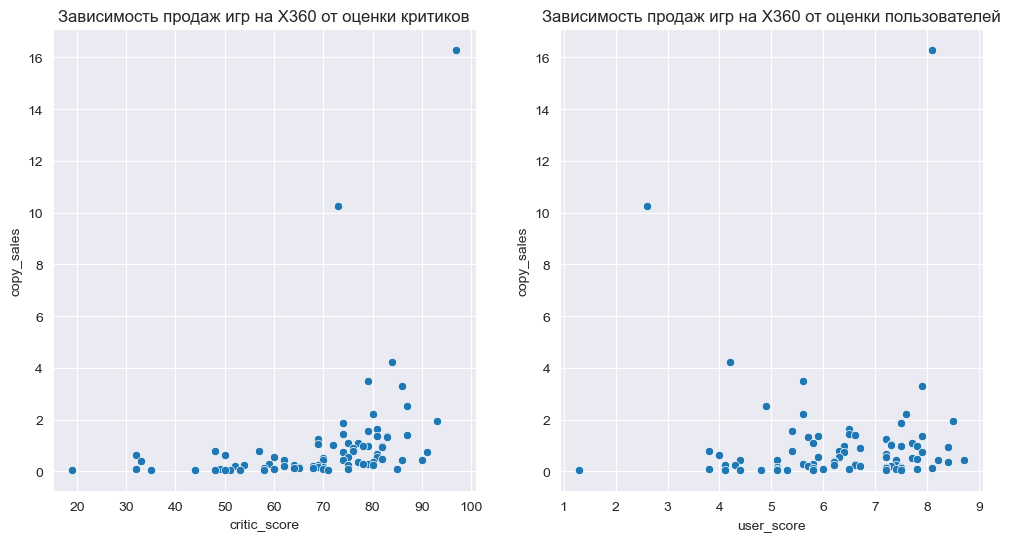

In [48]:
x360 = actual_games_df.loc[
    (actual_games_df['platform'] == "X360") &
    (actual_games_df['user_score'] != -1) &
    (actual_games_df['critic_score'] != -1)
    ]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=x360, x='critic_score', y='copy_sales')
plt.title('Зависимость продаж игр на X360 от оценки критиков')

plt.subplot(1, 2, 2)
sns.scatterplot(data=x360, x='user_score', y='copy_sales')
plt.title('Зависимость продаж игр на X360 от оценки пользователей');

In [49]:
print('Коэффициент корреляции продаж и оценок критиков:', round(x360['critic_score'].corr(x360['copy_sales']), 2))
print('Коэффициент корреляции продаж и оценок пользователей:', round(x360['user_score'].corr(x360['copy_sales']), 2))

Коэффициент корреляции продаж и оценок критиков: 0.35
Коэффициент корреляции продаж и оценок пользователей: -0.01


С остальными графиками картина та же — оценки пользователей практически не влияют на продажи игр, в то время, как оценка критиков оказывает на это достаточное влияние.

Теперь проверим распределение игр по жанрам, а также найдем наиболее и наименее прибыльные жанры игр.

In [50]:
game_genre = actual_games_df.pivot_table(index='genre', values='copy_sales', aggfunc='sum').sort_values(by='copy_sales', ascending=False)
game_genre

,copy_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


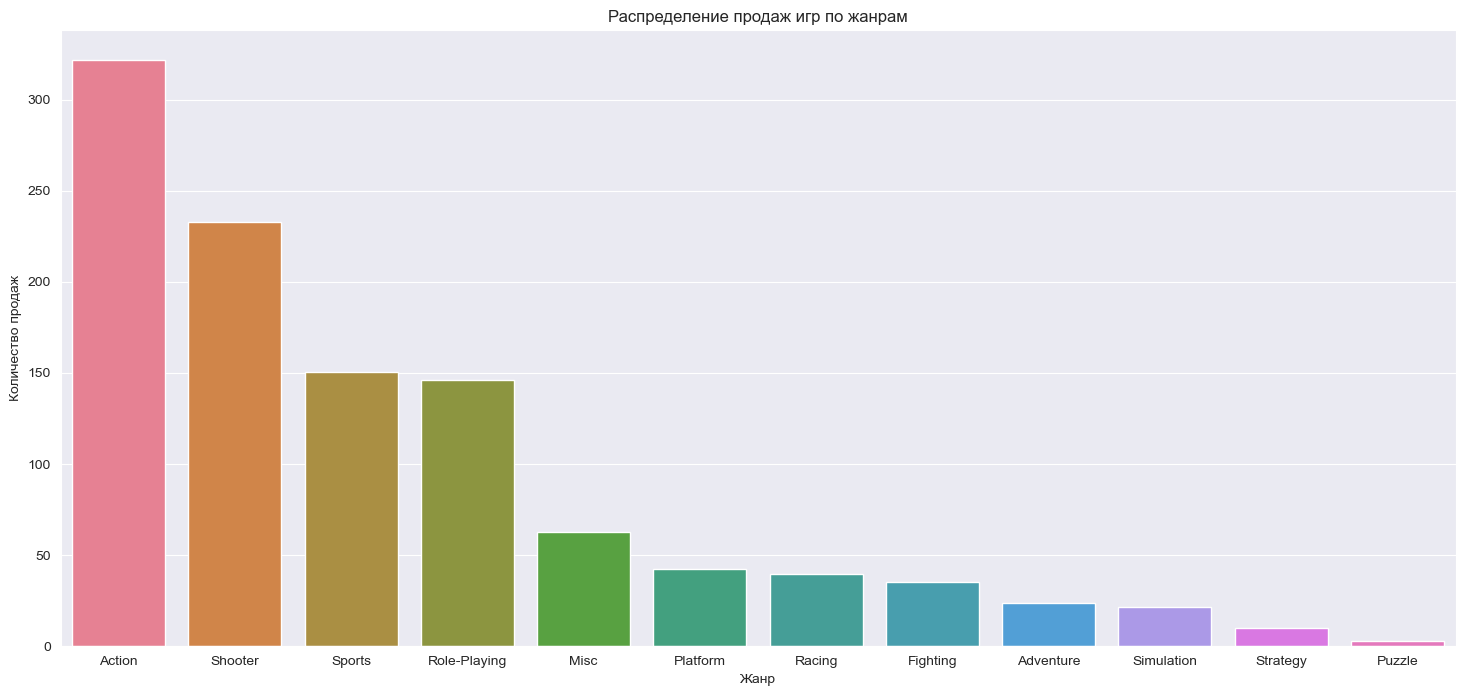

In [76]:
plt.subplots(figsize=(18, 8))
sns.barplot(x=game_genre.index, y=game_genre.copy_sales, data=game_genre, hue=game_genre.index, legend=False)
sns.color_palette("coolwarm", as_cmap=True)
plt.title('Распределение продаж игр по жанрам')
plt.ylabel('Количество продаж')
plt.xlabel('Жанр');

В топ-5 популярных жанров вошли Action, Shooter, Sports, Role-Playing и Misc. Теперь можно посмотреть средние продажи игр по жанрам.

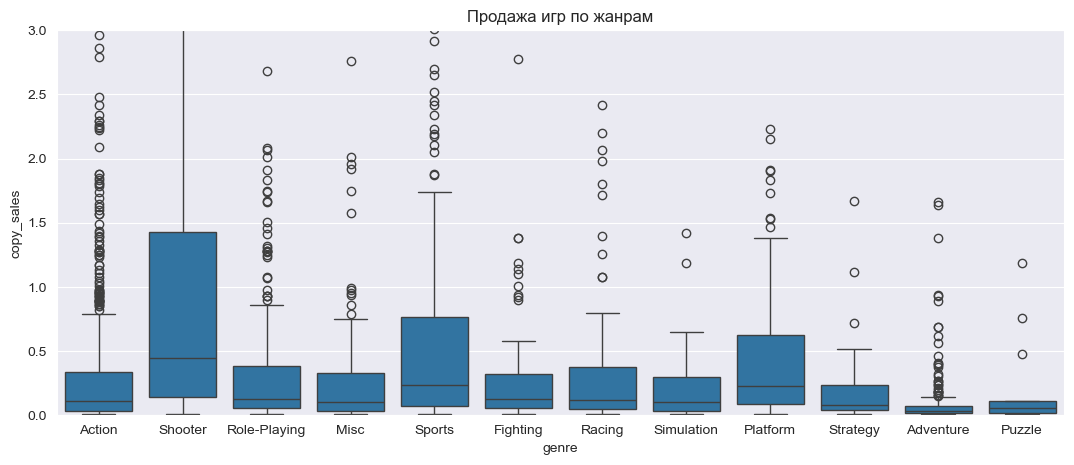

In [52]:
plt.figure(figsize=(13, 5))
sns.boxplot(x=actual_games_df.genre, y=actual_games_df.copy_sales)
plt.title('Продажа игр по жанрам')
_ = plt.ylim(0, 3);

In [85]:

games_critic_rating = actual_games_df.pivot_table(index='genre', values='critic_score').sort_values(by='critic_score', ascending=False)
games_critic_rating

,critic_score
genre,
Shooter,51.967914
Racing,50.835294
Platform,50.567568
Sports,37.028037
Fighting,36.062500
Strategy,34.089286
Role-Playing,31.390411
Puzzle,30.529412
Simulation,28.741935


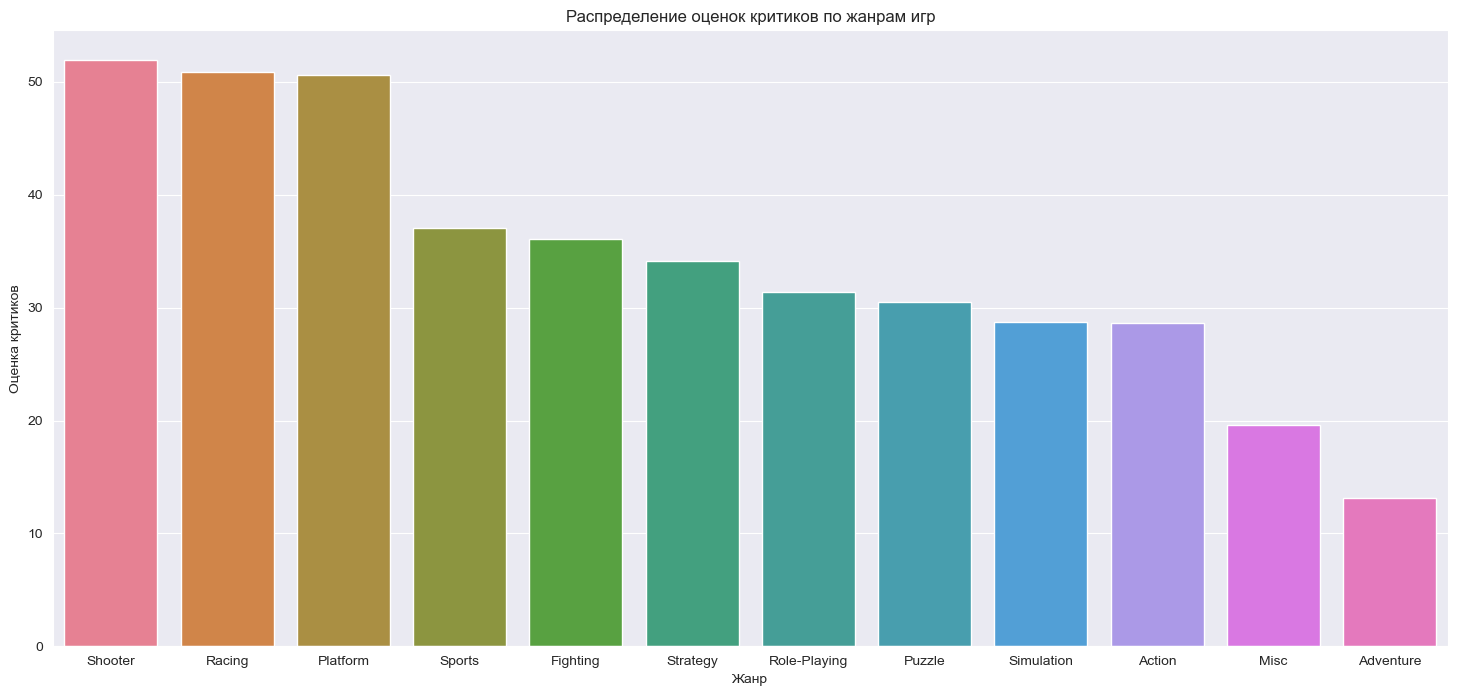

In [86]:
plt.subplots(figsize=(18, 8))
sns.barplot(x=games_critic_rating.index, y=games_critic_rating.critic_score, data=games_critic_rating, hue=games_critic_rating.index, legend=False)
sns.color_palette("coolwarm", as_cmap=True)
plt.title('Распределение оценок критиков по жанрам игр')
plt.ylabel('Оценка критиков')
plt.xlabel('Жанр');

In [79]:
games_user_rating = actual_games_df.pivot_table(index='genre', values='user_score').sort_values(by='user_score', ascending=False)
games_user_rating

,user_score
genre,
Shooter,5.125134
Platform,5.045946
Racing,4.414118
Fighting,3.822500
Sports,3.664019
Action,2.980157
Role-Playing,2.901370
Strategy,2.848214
Simulation,2.527419


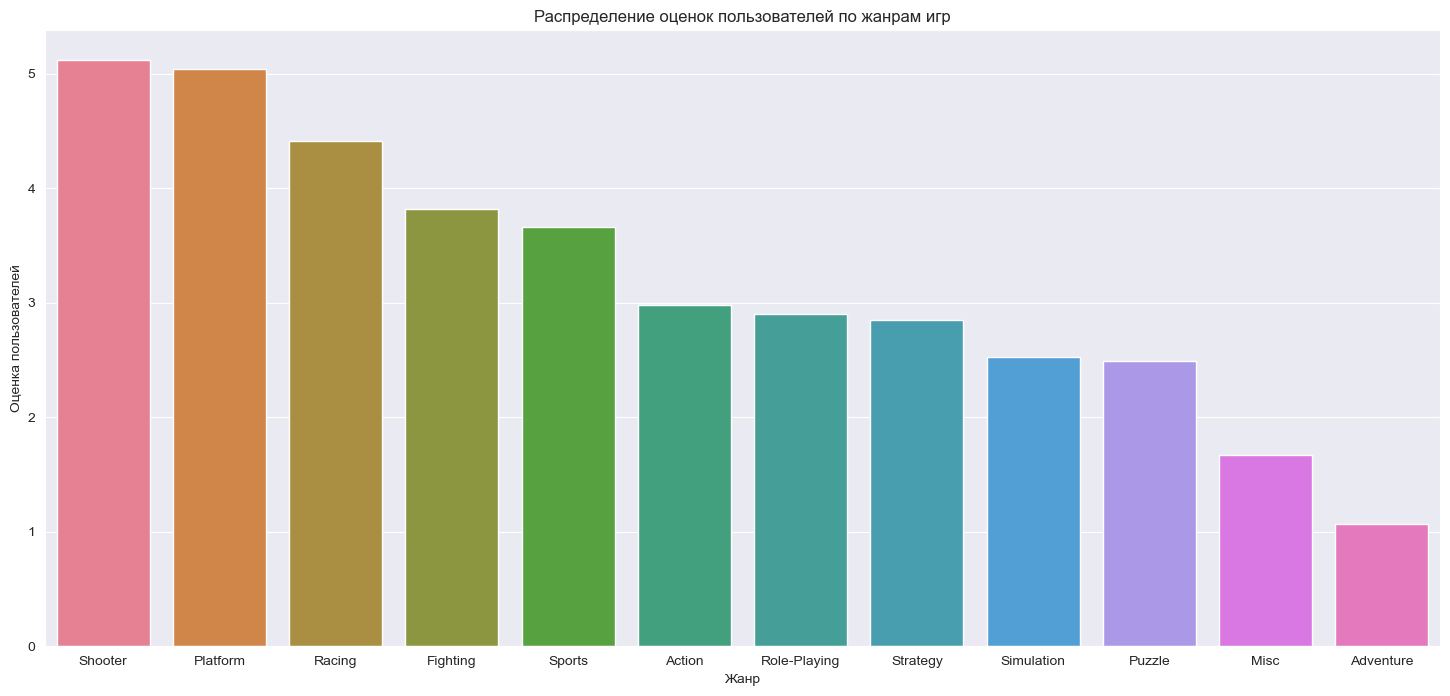

In [87]:
plt.subplots(figsize=(18, 8))
sns.barplot(x=games_user_rating.index, y=games_user_rating.user_score, data=games_user_rating, hue=games_user_rating.index, legend=False)
sns.color_palette("coolwarm", as_cmap=True)
plt.title('Распределение оценок пользователей по жанрам игр')
plt.ylabel('Оценка пользователей')
plt.xlabel('Жанр');

Если смотреть на средние продажи игр по жанрам, то лидером мы можем выделить шутер. Наиболее продаваемыми играми являются игры жанров Shooter, Sports, Platform. Наименее популярны на рынке 2013-2016 годов игры Adventure, Puzzle и Strategy. Наиболее высокооцененные жанры критиками являются Shooter, Racing, Platform, а пользователями — Shooter, Platform, Racing. Наинизшие оценки получили игры в жанре Adventure и Misc.

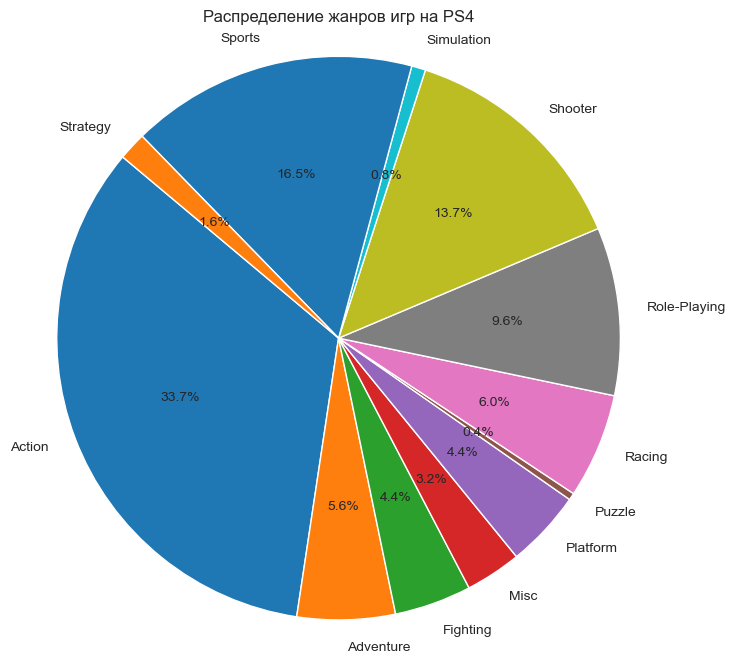

In [592]:
ps4_games = ps4.pivot_table(index='genre', values='copy_sales', aggfunc='count')
plt.figure(figsize=(8, 8))
plt.pie(ps4_games['copy_sales'], labels=ps4_games.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение жанров игр на PS4')
plt.axis('equal');

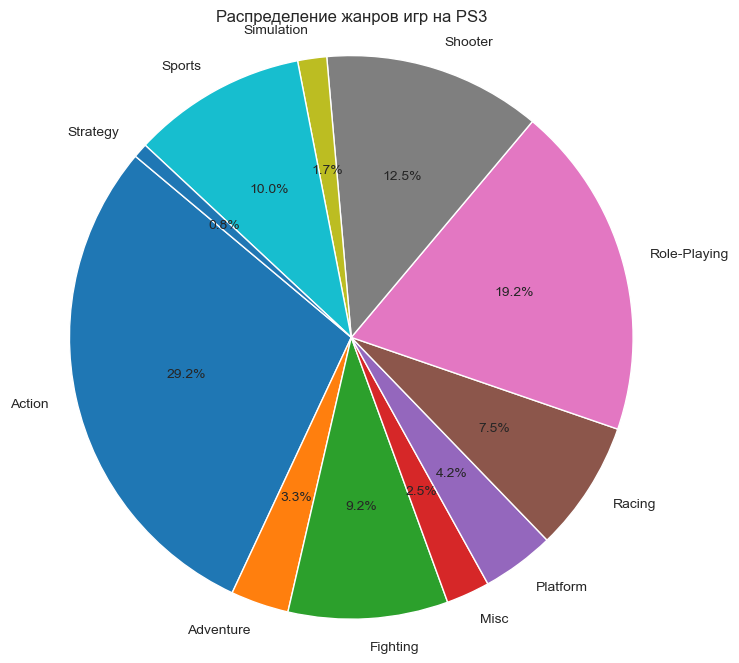

In [593]:
ps3_games = ps3.pivot_table(index='genre', values='copy_sales', aggfunc='count')
plt.figure(figsize=(8, 8))
plt.pie(ps3_games['copy_sales'], labels=ps3_games.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение жанров игр на PS3')
plt.axis('equal');

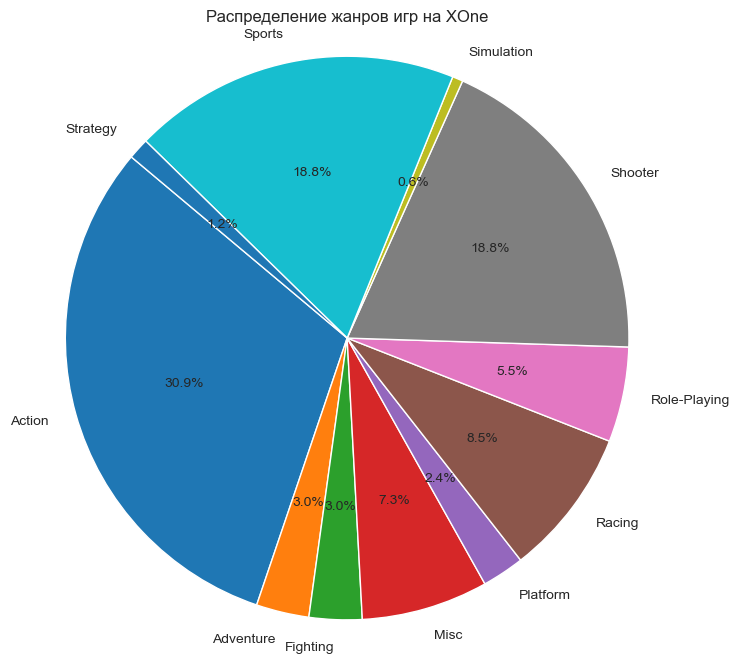

In [594]:
xone_games = xone.pivot_table(index='genre', values='copy_sales', aggfunc='count')
plt.figure(figsize=(8, 8))
plt.pie(xone_games['copy_sales'], labels=xone_games.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение жанров игр на XOne')
plt.axis('equal');

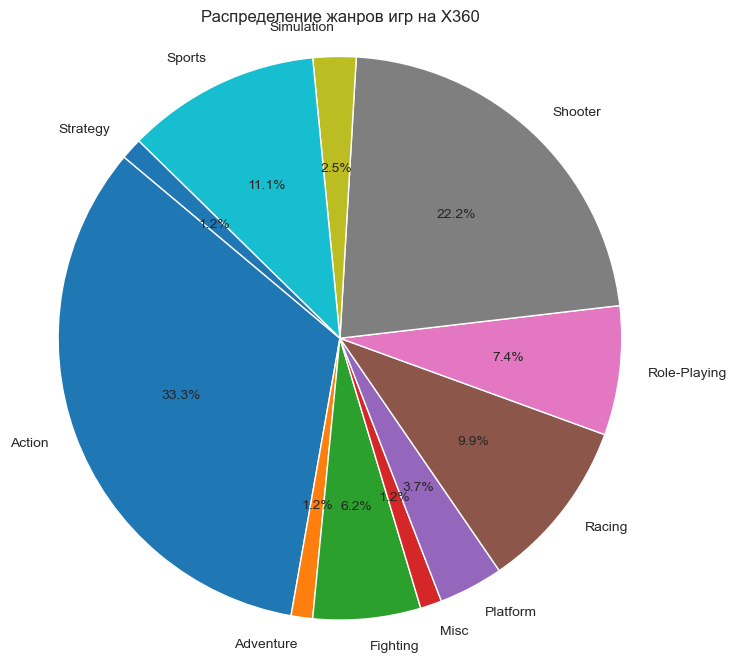

In [595]:
x360_games = x360.pivot_table(index='genre', values='copy_sales', aggfunc='count')
plt.figure(figsize=(8, 8))
plt.pie(x360_games['copy_sales'], labels=x360_games.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение жанров игр на X360')
plt.axis('equal');

Из данных диаграм видно, что количество проданных игр для разных платформ разное. К примеру, на PS3 было продано больше РПГ игр, чем на PS4. А игры жанра Puzzle не продавались ни к одной платформе кроме PS4. Игры жанрa Misc более востребованы на платформе XOne, там их доля составляет 7.3%. Но, вне зависимости от платформы, в топ-3 входят жанры Action, Shooter и Sports. 

Исходя из и сследовательского анализа данных, видно, что больше всего игр было продано в период с 2007 по 2010 года, пика продаж достигли игры в 2008 и 2009 годах: в это время было продано по 1427 и 1426 копий соответственно.
Это объясняется ростом популярности таких консольных игровых платформ как PS2, PS3, Wii, Xbox 360. Данные консоли уже были на рынке и привлекали большое внимание пользователей, что и способствовало росту продаж игр. Также стоит отметить тот факт, 
 что глобальный мирового кризис в 2008 году также привел к тому, что люди искали более доступные развлечения, среди которых оказались и видеоигры. Они были более доступным способом развлечения, чем кино или путешествия. К тому же игры были долговременным досугом.
 В это время вышло множество высококачественных и ожидаемых игр, таких как "Grand Theft Auto IV" (2008) и "Call of Duty: Modern Warfare" (2007). Эти игры привлекли большое количество игроков и способствовали увеличению продаж. 
Так же игры стали доступнее для различных платформ, включая ПК, консоли и даже мобильные устройства, что расширило аудиторию. Начиная с 2002 года начали появляться игровые онлайн-сервисы с возможностью покупки игр, что к 2008-2009 году стало довольно популярным и повысило уровень продаж игр.

Исходя из построенных графиков, можно увидеть, что на популярность платформы приходится всего около 4-5 лет. Также, учитывая, что игры в среднем разрабатываются около 4-5 лет (на период 2013-2016 года), то за актуальный период, который поможет спрогнозировать продажи на 2017 год, я взяла 2013-2016 годы.
Среди актуальных игровых платформ оказались 'PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV','DS', 'PSP'. Однако, учитывая, что поддержка PSP была прекращена в 2015 году, а DS заменила 3DS, учитывать в построении прогноза их не стоит.
На пике популярности в это время находятся PS4 и XOne. В среднем, больше всего игр продается на PS4, XOne, 3DS, PS3 и X360. 

Было отмечено, что отзывы критиков играют большую роль на уровень продаж игр, вто время, как отзывы пользователей практически не влияют на это. Среди популярных жанров оказались Action, Shooter, Sports, Role-Playing, Misc. Однако, лидером по средним продажам является Shooter, после которого можно выделить Sports и Platform. Наименьшего уровня продаж достигли игры жанров Adventure, Puzzle и Strategy.
Также глядя на популярность жанров в распределении по платформам, можно отметить, что на PS4 наиболее популярными являются игры жанров Action — 33.7%, Sports — 16.5%, Shooter — 13.7%, Role-Playing — 9.6%. Всего 0.4% приходится на игры жанра Puzzle. Стоит отметить, что данная платформа является единственной, предоставляющей игры этого жанра.
На PS3 в топ популярных жанров вошли Action — 29.2%, Role-Playing — 19.2%, Shooter — 12.5%, Sports — 10%. Уровень продаж жанра Fighting на данной платформе составил 9.2%, что на 4.8% выше чем на PS4.
На такой платформе как XOne лидером продаж является Action — 30.9%, далее расположились Sports и Shooter по 18.8%, на третьем месте — Racing с продажами в 8.5%. Также стоит отметить, что уровень продаж игр жанра Misc составляет 7.3%, данная платформа является лидером продаж игр в данном жанре. 
На X360 лидером продаж также является Action — 33.3%, Shooter — 22.2%, Sports — 11.1%, Racing — 9.9%. X360 является лидером по продажам игр в жанре Racing. 

Из полученных результатов можно сделать вывод, что на пике популярности находятся 3 жанра, а именно — Action, Shooter и Sports вне зависимости от платформы.

ПОРТРЕТЫ ПОЛЬЗОВАТЕЛЕЙ ПО РЕГИОНАМ

СЕВЕРО-АМЕРИКАНСКИЙ РЕГИОН

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. 
- «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. 
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови.
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.

In [53]:
na_platforms = actual_games_df.pivot_table(index='platform', values='na_sales', aggfunc='sum').nlargest(5, 'na_sales')
na_platforms

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


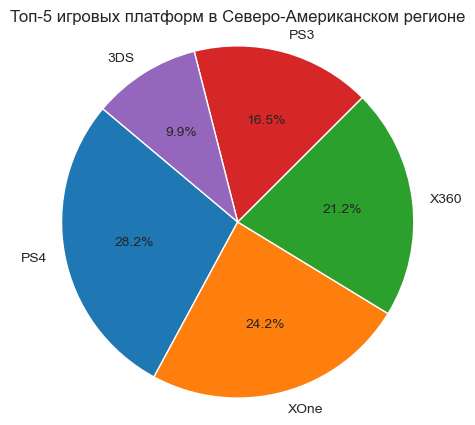

In [54]:
plt.figure(figsize=(5, 5))
plt.pie(na_platforms['na_sales'], labels=na_platforms.index, autopct='%1.1f%%', startangle=140)
plt.title('Топ-5 игровых платформ в Северо-Американском регионе')
plt.axis('equal');

In [55]:
na_genres = actual_games_df.pivot_table(index='genre', values='na_sales', aggfunc='sum').nlargest(5, 'na_sales')
na_genres

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


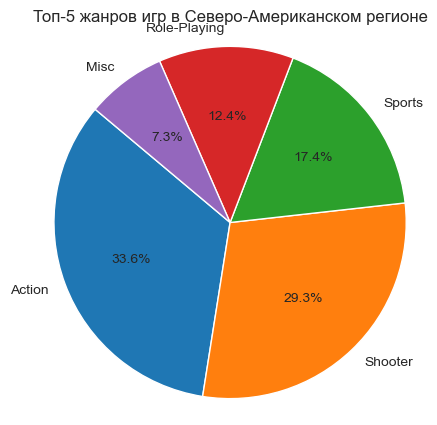

In [56]:
plt.figure(figsize=(5, 5))
plt.pie(na_genres['na_sales'], labels=na_genres.index, autopct='%1.1f%%', startangle=140)
plt.title('Топ-5 жанров игр в Северо-Американском регионе')
plt.axis('equal');

In [57]:
actual_rating = actual_games_df[actual_games_df['rating'] != -1]
na_rating = actual_rating.pivot_table(index='rating', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False)
na_rating

,na_sales
rating,
M,165.21
E,79.05
E10+,54.24
T,49.79


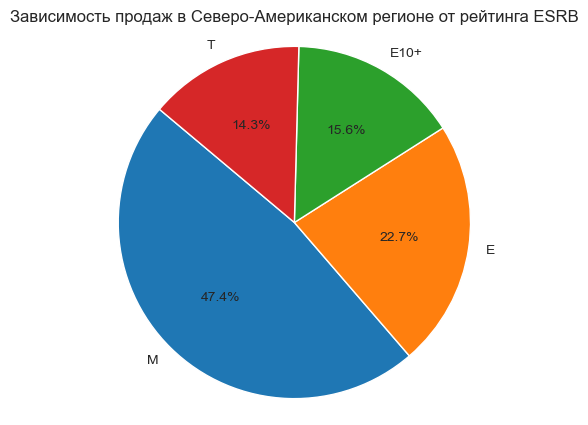

In [58]:
plt.figure(figsize=(5, 5))
plt.pie(na_rating['na_sales'], labels=na_rating.index, autopct='%1.1f%%', startangle=140)
plt.title('Зависимость продаж в Северо-Американском регионе от рейтинга ESRB')
plt.axis('equal');

ЕВРОПЕЙСКИЙ РЕГИОН

In [59]:
eu_platforms = actual_games_df.pivot_table(index='platform', values='eu_sales', aggfunc='sum').nlargest(5, 'eu_sales')
eu_platforms

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


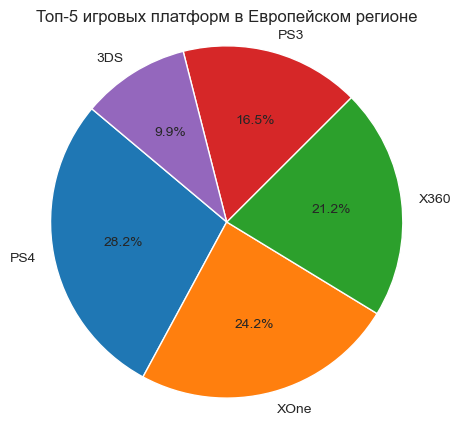

In [60]:
plt.figure(figsize=(5, 5))
plt.pie(na_platforms['na_sales'], labels=na_platforms.index, autopct='%1.1f%%', startangle=140)
plt.title('Топ-5 игровых платформ в Европейском регионе')
plt.axis('equal');

In [61]:
eu_genres = actual_games_df.pivot_table(index='genre', values='eu_sales', aggfunc='sum').nlargest(5, 'eu_sales')
eu_genres

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


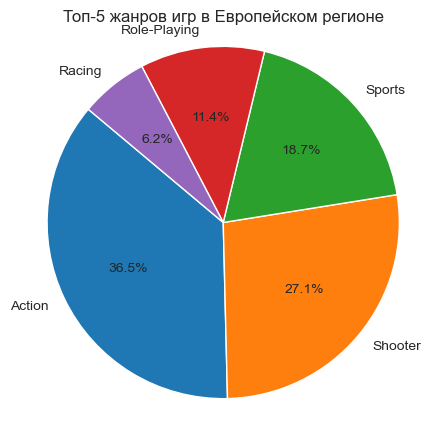

In [62]:
plt.figure(figsize=(5, 5))
plt.pie(eu_genres['eu_sales'], labels=eu_genres.index, autopct='%1.1f%%', startangle=140)
plt.title('Топ-5 жанров игр в Европейском регионе')
plt.axis('equal');

In [63]:
eu_rating = actual_rating.pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False)
eu_rating

,eu_sales
rating,
M,145.32
E,83.36
E10+,42.69
T,41.95


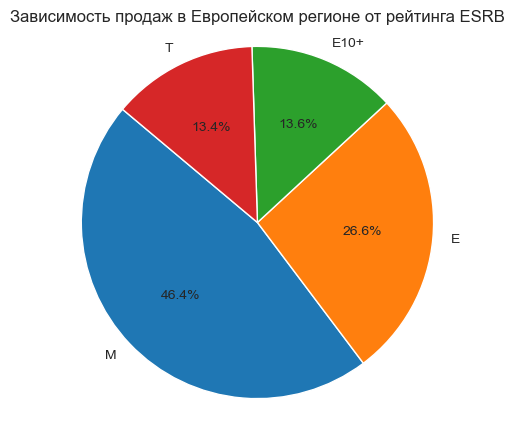

In [64]:
plt.figure(figsize=(5, 5))
plt.pie(eu_rating['eu_sales'], labels=eu_rating.index, autopct='%1.1f%%', startangle=140)
plt.title('Зависимость продаж в Европейском регионе от рейтинга ESRB')
plt.axis('equal');

ЯПОНИЯ

In [65]:
jp_platforms = actual_games_df.pivot_table(index='platform', values='jp_sales', aggfunc='sum').nlargest(5, 'jp_sales')
jp_platforms

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


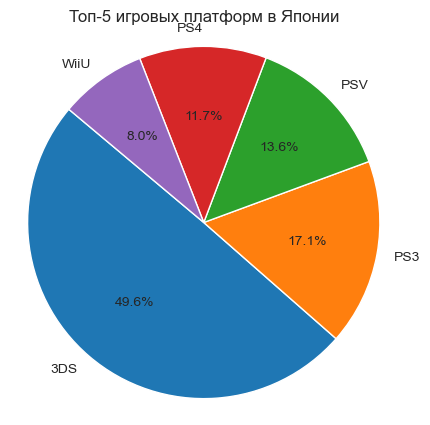

In [66]:
plt.figure(figsize=(5, 5))
plt.pie(jp_platforms['jp_sales'], labels=jp_platforms.index, autopct='%1.1f%%', startangle=140)
plt.title('Топ-5 игровых платформ в Японии')
plt.axis('equal');

In [67]:
jp_genres = actual_games_df.pivot_table(index='genre', values='jp_sales', aggfunc='sum').nlargest(5, 'jp_sales')
jp_genres

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


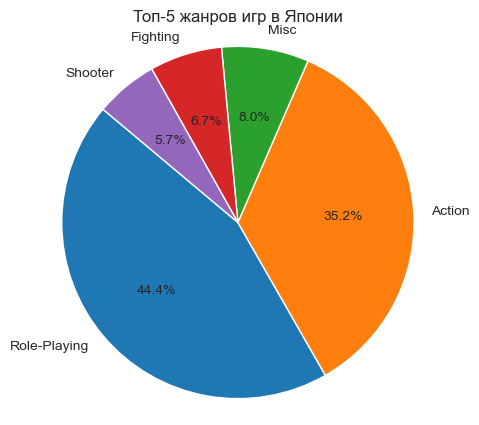

In [68]:
plt.figure(figsize=(5, 5))
plt.pie(jp_genres['jp_sales'], labels=jp_genres.index, autopct='%1.1f%%', startangle=140)
plt.title('Топ-5 жанров игр в Японии')
plt.axis('equal');

In [69]:
jp_rating = actual_rating.pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False)
jp_rating

,jp_sales
rating,
T,20.59
E,15.14
M,14.11
E10+,5.89


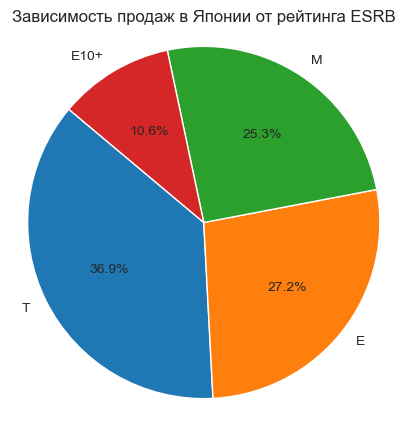

In [70]:
plt.figure(figsize=(5, 5))
plt.pie(jp_rating['jp_sales'], labels=jp_rating.index, autopct='%1.1f%%', startangle=140)
plt.title('Зависимость продаж в Японии от рейтинга ESRB')
plt.axis('equal');

Построив портреты пользовательских предпочтений по регионам, мы можем выявить, что они отличаются как в игровых жанрах, так и в платформах. 
Пользователи из Северо-Американского региона отдают предпочтение:
- Таким платформам как PS4, XOne и X360.
- Среди наиболее популярных жанров данного региона оказались Action (в данном жанре было продано 126.05 млн копий), Shooter (109.74 млн копий) и Sports (65.27 млн копий).
- Наиболее продаваемыми оказались игры жанра «M» («Mature») — «Для взрослых», наименее — «T» («Teen») — «Подросткам». 

Среди предпочтений европейцев можно отметить:
- Популярными платформами являются PS4, PS3, XOne.
- Популярными жанрами являются Action (118.13 млн проданных копий), Shooter (87.86 млн копий), Sports (60.52 млн копий).
- Наиболее продаваемым жанром здесь также является «M» («Mature») — «Для взрослых», а наименее продаваемым — «T» («Teen») — «Подросткам». 

В ситуации с Японией, здесь картина абсолютно другая. 
- Среди платформ пользователи отдают предпочтение 3DS, PS3, PSV. На 5 месте расположилась WiiU, которая не вошла в топ-5 используемых платформ в Северной-Америке и Европе. Вероятно потому что является наследницей японской компании Nintendo, которая также более популярна в своем регионе.
- Наиболее популярным жанром в Японии можно выделить Role-Playing (51.04 млн проданных копий), Action (40.49 млн копий), Misc (9.20 млн копий).
- Наиболее продаваемым жанром является «T» («Teen») — «Подросткам», наименее — «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше». 

Думаю, в Японском регионе рейтинг ESRB не оказывает особого влияния на уровень продаж, так как данная организация является Американской.  В Японии вопросами рейтингов видеоигр занимаются три общественные организации: EOCS, Computer Entertainment Rating Organization (CERO) волонтёрский Japan Contents Review Center (JCRC) (последняя следит за исполнением японских законов о непристойности в СМИ). Также в столбце с рейтингом имелось некоторое количество пропусков, которые были заменены заглушной -1, что также могло оказать влияние на данные результаты.
В Американском и Европейском регионах рейтинг ESRB оказывает влияние на уровень продаж видеоигр, так как по диаграммам видно, что среди всех доступных рейтингов, преобладает именно «M» («Mature») — «Для взрослых»? xnj cjcnfdzktn 47.4% и 46.4% соответственно. Думаю, это определяется культурными ценностями каждого региона. 
Также в целом можно заметить, что в Японии покупают гораздо меньше видеоигр, чем в Америке или Европе.

ПРОВЕРКА ГИПОТЕЗ

- Н0 — Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.
- Альтернативная гипотеза — Средние пользовательские рейтинги платформ Xbox One и PC различаются.

In [614]:
pc = actual_games_df.loc[
    (actual_games_df['platform'] == "PC") &
    (actual_games_df['user_score'] != -1) &
    (actual_games_df['critic_score'] != -1)
    ]

In [644]:
alpha = 0.05
results = st.ttest_ind(xone['user_score'], pc['user_score'], equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.1788264826340131
Не отвергаем нулевую гипотезу


In [645]:
print('Средний пользовательский рейтинг платформы Xbox One:', round(xone['user_score'].mean(), 2))
print('Средний пользовательский рейтинг платформы PC:', round(pc['user_score'].mean(), 2))

Средний пользовательский рейтинг платформы Xbox One: 6.54
Средний пользовательский рейтинг платформы PC: 6.3


Мы не можем отвергнуть нулевую гипотезу о равенстве пользовательских рейтингов по игровым платформам Xbox One и PC, так как сделав это, мы бы допустили ошибку с вероятностью 17%. Рейтинги обеих платформ практически равны.

- Н0 — Средние пользовательские рейтинги жанров Action и Sports равны.
- Альтернативная гипотеза — Средние пользовательские рейтинги жанров Action и Sports разные.

In [646]:
alpha = 0.05
action_genre = actual_games_df.query('genre == "Action"')
sports_genre = actual_games_df.query('genre == "Sports"')

result = st.ttest_ind(action_genre['user_score'], sports_genre['user_score'], equal_var=False)

print('p-значение:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.008445505365573197
Отвергаем нулевую гипотезу


In [647]:
print('Средний пользовательский рейтинг жанра "Action":', round(action_genre['user_score'].mean(), 2))
print('Средний пользовательский рейтинг жанра "Sports":', round(sports_genre['user_score'].mean(), 2))

Средний пользовательский рейтинг жанра "Action": 2.98
Средний пользовательский рейтинг жанра "Sports": 3.66


Мы можем отвергнуть нулевую гипотезу о равенстве пользовательских рейтингов по жанрам Action и Sports. Средние пользовательские рейтинги для данных жанров игр различаются и при выпуске новых игр можно сделать упор на игры в жанре Sports.

В качестве нулевых гипотез я выбрала гипотезы о равенстве средних как для пользовательских рейтингов платформ, так и для пользовательских рейтингов жанров. Обычно нулевая гипотеза формулируется так, чтобы утверждать отсутствие различия или влияния. В качестве же альтернативных гипотез я выбрала разность средних пользовательских рейтингов и для жанров, и для платформ. Значение alpha я установила равным 0.05, при таком значении α мы имеем более жесткие критерии для отклонения нулевой гипотезы. Это означает, что вероятность ошибки первого рода (когда отвергнута H0) составляет 5%.
В качестве критерия для проверки гипотез я выбрала двухвыборочный Т-тест, так как с его помощью можно проверить равенство средних значений двух выборок. Также в параметре equal_var я указала значение False, так как оно не предполагает равных дисперсий генеральной совокупности.

В первом случае, при проверке гипотезы о равенстве средних пользовательских рейтингов для платформ Xbox One и PC мы не смогли отвергнуть нулевую гипотезу, так как p-value равно 0.17, что выше alpha = 0.05. Это означает, что средние рейтинги примерно равны. Средний рейтинг для Xbox One составил 6.54, а для PC — 6.3.

Во втором случае, при проверке гипотезы о равенстве средних рейтингов игр жанром Action и Sports мы можем отвергнуть нулевую гипотезу, так как p-value равняется 0.008. А средний рейтинг Sports составил 3.66, что действительно выше среднего рейтинга игр в жанре Action, который равен 2.98.

Рынок видеоигр постепенно развивался начиная с 1994 года, однако своего пика достиг к 2008-2009 году, что может быть связано с различными факторами, такими как глобальный финансовый кризис, популярность новых игровых платформ таких как PS2, PS3, Wii, Xbox 360, выходом новых игр, которые становились популярными. На актуальный период для построения прогноза продаж 2017 года (2013-2016 года) актуальными платформами являются PS4, XOne, 3DS, PS3 и X360. На данные платформы продается больше всего видеоигр, также начиют появляться различные мультиплатформенные игры. В этот период пользователи отдают предпочтение таким игровым жанрам как ались Action, Shooter, Sports, Role-Playing, Misc.

Первые три жанра являются лидерами продаж вне зависимости от платформы. Наименее популярны у пользователей такие жанры как Adventure, Puzzle и Strategy. Популярность таких жанров как Racing и Misc варьируется от платформы к платформе. А жанр Puzzle доступен только на PS4. Также было выявлено, что средняя продолжительность жизни платформы составляет около 8 лет, но популярной платформа является лишь 4-5 из них, вероятно, это можно объяснить как временем на которое уходит создание новой игры, так и качеством самих игр. Я считаю, что качество игры оказывает большую роль на уровень ее продаж вне зависимости от платформы. Если игра высокого качества с хорошей визуализацией и механикой, но на ее разработку уйдет около 6-7 лет, то после ее выхода уровень продаж по платформе может пойти вверх, после чего и продолжительность ее популярности и среднее время жизни увеличится.

Также было выявлено, что наиболее высокие оценки от критиков и пользователей получают игры в жанре Shooter, Platform и Racing. В разрезе по регионам было выявлено, что предпочтения пользователей Северо-Американского и Европейского регионов практически совпадают. Они отдают предпочтения таким игровым платформам как PS4 и XOne. Среди лидеров по жанрам в данных регионах были определены Action, Shooter и Sports. При планировании создания игр, направленных на жителей данных регионов стоит уделить внимание именно данным платформам и этим жанрам игр. При планировании выхода на Японский рынок можно уделить внимание платформе PS3, так как данная платформа также используется и жителями первых двух регионов, хоть и немного меньше, а также можно создать игры на платформы 3DS и PSV. Action занимает 2 место среди наиболее продаваемых жанров в Японии, и первое место в Европе и Америке, поэтому наиболее оптимальным вариантом будет создание игр данного жанра.
Жанр «E» («Everyone») — «Для всех» занимает второе место среди всех проданных игр в каждом регионе. Несмотря на то, что объективно оценить продажи по жанрам в Японии у нас нет возможности, но учитывая культурные особенности ее жителей, можно рекомендовать продажи игр именно с этим рейтингом.

Таким образом, подведя итоги для прогноза продаж на 2017 год:
- Можно рекомендовать продажи игр для всех регионов на PS3 жанра Action или Role-Playing с рейтингом «E».
- Для продаж игр в Европейском и Северо-Американском регионе можно рекомендовать продажи игр на PS4 в жанре Action, Shooter, Sports (так как они наиболее продаваемы и высоко оцениваются пользователями и критиками), а также игры жанра Platform, так как их оценки также высоки, несмотря на то, что они не входят в топ-5 по количеству продаж.